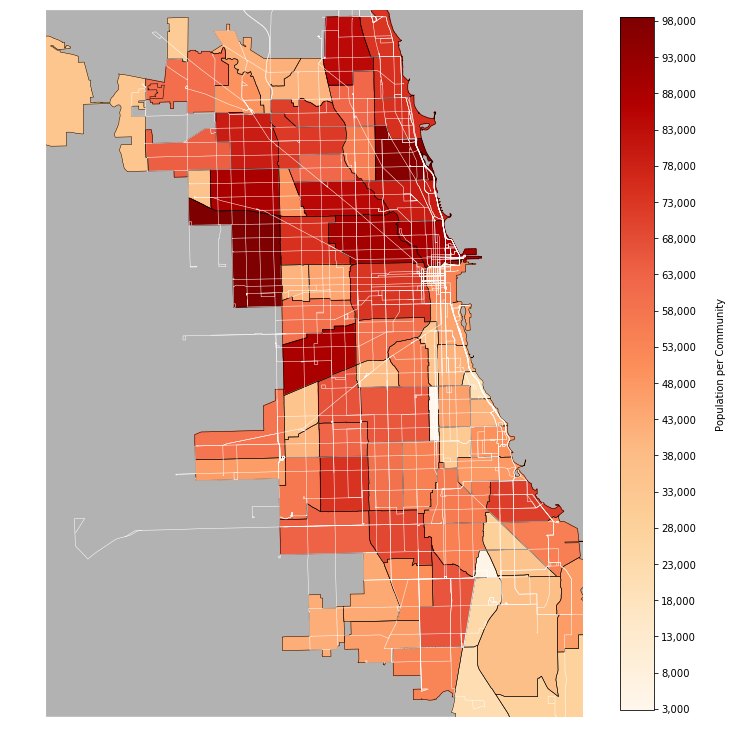

In [1]:
# Jupyter Notebook magic command to show the plots
%matplotlib inline
import itertools
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.colors import rgb2hex
from matplotlib.patches import Polygon
import matplotlib.ticker as ticker

# define a function for formating tics with ','
def fmt(x, pos):
    s = '%d' % x
    groups = []
    while s and s[-1].isdigit():
        groups.append(s[-3:])
        s = s[:-3]
    return s + ','.join(reversed(groups))

# Import pandas module
import pandas as pd
# Read and load the CSV file into a Dataframe object
df = pd.read_csv('data/CCASF12010CMAP.csv')
# Only get the Geog and Total Population
df = df[['Geog', 'Total Population']]
# Then do some normalization of data. (O'Hare -> OHARE). Basemap did not have it right with "'".
df['Geog'] = df['Geog'].str.strip("'").str.upper()
df.head()
# Make a dict of community - population Key Value pair.
community_pop = dict(zip(df['Geog'], df['Total Population']))

# Set the figure and plot
fig = plt.figure()
fig.set_size_inches(13,13)
ax = fig.add_subplot()
ax = plt.gca() 
ax.set_facecolor('#B2B2B2')

# Create an instnce of the Basemap for Chicago using the following lat-long parameters
m = Basemap(llcrnrlon=-87.9064638883872286,
            llcrnrlat=41.64846088888256,
            urcrnrlon=-87.525897644283177,
            urcrnrlat=42.022643093713917,
            lon_0=-87.73212452470355, lat_0=41.833733, ellps = 'WGS84', 
            lat_ts=0, resolution='l', suppress_ticks=False,
            projection="tmerc")
m.fillcontinents(color='#B2B2B2')

# render the shapefiles (area and bus routes) on the instance of chicago basemap.
shp_area = m.readshapefile('shapefiles/Boundaries_Community_Areas_current/geo_export_02440c3e-503b-476f-82cd-81f4d1dc2c97',
                           name='Boundaries', drawbounds=True, color='#000000')
shp_route = m.readshapefile('shapefiles/CTA_Routes/CTA_Routes_geometric', name='Name', drawbounds=True, 
                            color='white')

# Set set, list and thier values for potting into basemaps
colors={}
communities=[]
cmap = plt.cm.OrRd
vmin = community_pop[min(community_pop.keys(), key=(lambda k: community_pop[k]))]
vmax = community_pop[max(community_pop.keys(), key=(lambda k: community_pop[k]))] # set range.
plt.axis("off")

# Plot the communities with colormap reflecting the population information
for shapedict in m.Boundaries_info:
    community = shapedict['community']
    pop = community_pop[community]
    colors[community] = cmap(np.sqrt((pop-vmin)/(vmax-vmin)))[:3]
    communities.append(community)

# Plot the bus routedon top of the communities
for nshape,seg in enumerate(m.Boundaries):
    colors[communities[nshape]]
    color = rgb2hex(colors[communities[nshape]]) 
    poly = Polygon(seg, facecolor=color, edgecolor=color)
    ax.add_patch(poly)

# Set legend 
im = ax.imshow(np.random.random((len(community_pop),2)), vmin=vmin, vmax=vmax, cmap=cmap)    
cbar = fig.colorbar(im, ticks=[np.arange(3000, 100000, 5000)], format=ticker.FuncFormatter(fmt), shrink=0.98)
cbar.set_label('Population per Community', labelpad=20)
